<a href="https://colab.research.google.com/github/mdr356/ml_cnn_keras_fashion_mnist_ml/blob/master/keras_fashion_mnist_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Fully Connected Neural Network**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


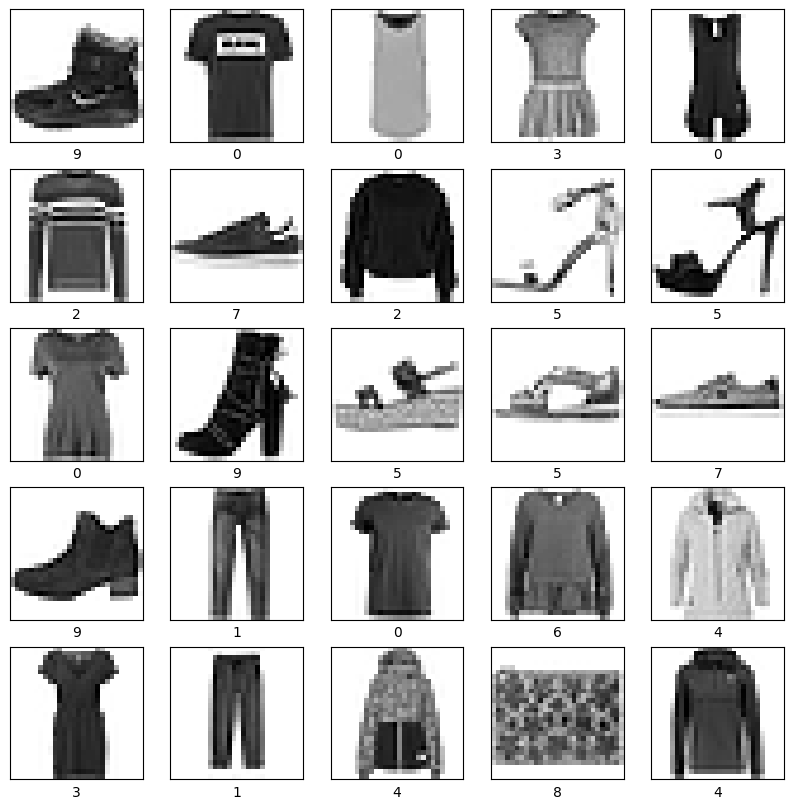

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7826 - loss: 0.6259
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8606 - loss: 0.3862
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8760 - loss: 0.3411
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8833 - loss: 0.3190
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8912 - loss: 0.2956


In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#print some images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()
# normalize [0 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# flatten layer
l0 = tf.keras.layers.Flatten(input_shape=(28, 28, 1))
# Dense layer
l1 = tf.keras.layers.Dense(128, activation='relu')
# Output Dense layer
l3 = tf.keras.layers.Dense(10, activation='softmax')

# model
model = tf.keras.models.Sequential([l0, l1, l3])

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train dataset
model.fit(x_train, y_train, epochs=5)


**Part 2: Convolutional Neural Network (CNN)**
* **A convolution** is the process of applying a filter (“kernel”) to an image.
* **Max pooling** is the process of reducing the size of the image through downsampling.
* **Padding**: Adding pixels of some value, usually 0, around the input image
* **Pooling** The process of reducing the size of an image through downsampling.There are several types of pooling layers. For example, average pooling converts many values into a single value by taking the average. However, maxpooling is the most common.
* **Maxpooling**: A pooling process in which many values are converted into a single value by taking the maximum value from among them.
* **Stride**: the number of pixels to slide the kernel (filter) across the image.
* **Downsampling**: The act of reducing the size of an image

**Classification with CNN**

'convolutions" tf.keras.layers.Conv2D and MaxPooling2D- Network start with two pairs of Conv/MaxPool. The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding, and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). After that, the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2. The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer. So far in the course, we have described what a Convolution does, but we haven't yet covered how you chain multiples of these together. We will get back to this in lesson 4 when we
use color images. At this point, it's enough if you understand the kind of operation a convolutional filter performs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8031 - loss: 0.5517
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9008 - loss: 0.2729
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9188 - loss: 0.2196
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9277 - loss: 0.1901
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9422 - loss: 0.1604
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9505 - loss: 0.1379
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9569 - loss: 0.1164
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9649 - loss: 0.0963
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9694 - loss: 0.0819
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0693


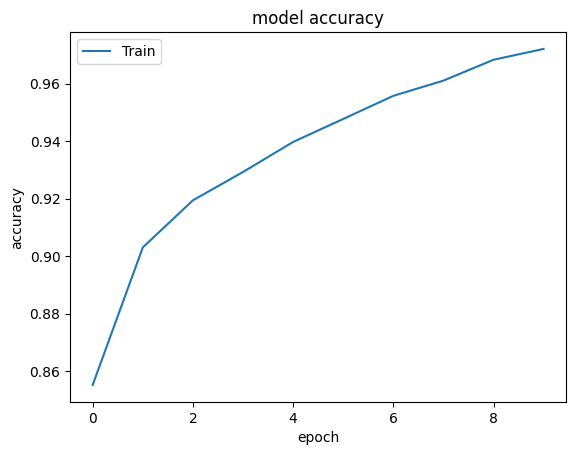

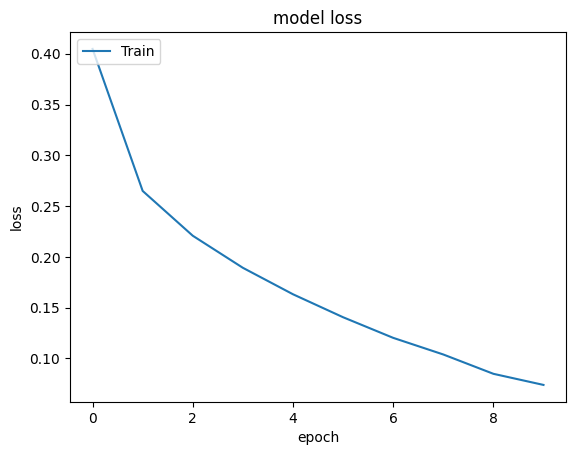

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Get Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize between [0 1]
x_train = x_train / 255
x_test = x_test / 255

# layer 0: with 3x3 kernel and padding to keep originla image size. 32 specify that 32 convoluted output will be created.
          ## The input is a single input image and the output after this layer will be 32 images. kernel_size is the filter size.
l0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1))
# layer 1: MaxPooling which is a process downsampling the image with MaxPooling being popular. we can also use average pooling.
   ## max pooling takes the maximum pixel from the filter.
l1 = tf.keras.layers.MaxPooling2D((2, 2), strides=2)
# layer 2: another Conv2D layer with a filter size of (3,3) outputing 64 images
l2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
# layer 3: another MaxPooling layer. To downsample the image
l3 = tf.keras.layers.MaxPooling2D((2, 2), strides=2)
# layer 4: lets flatten the image in order to pass it through a Dense layer
l4 = tf.keras.layers.Flatten()
# layer 5: is a Dense layer with 128 neurons
l5 = tf.keras.layers.Dense(128, activation='relu')
# layer 6: output layer with 10 neurons
l6 = tf.keras.layers.Dense(10, activation='softmax')

model = tf.keras.models.Sequential([l0, l1, l2, l3, l4, l5, l6])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

With the model trained, we can use it to make predictions about some images.